<a href="https://colab.research.google.com/github/agnesmtyas/Heart-Disease-Prediction-using-Machine-Learning/blob/master/Heart%20Disease%20Prediction%20using%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Data Preparation**

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Proses extract data
data_heart = pd.read_csv('heart.csv')

# Tampilkan data
data_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## **Informasi Umum pada Data**

In [ ]:
# Akses informasi umum pada data transaksi
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# Memeriksa jumlah baris dan kolom
data_heart.shape

print(f'Terdapat {data_heart.shape[0]} baris dan {data_heart.shape[1]} kolom pada data heart disease')

Terdapat 1025 baris dan 14 kolom pada data heart disease


Berikut kolom pada dataset:
*   age = umur pasien
*   sex = jenis kelamin pasien
*   cp (chest pain type) = jenis nyeri dada (4 values)
*   trestbps (resting blood pressure) = tekanan darah ketika beristirahat
*   chol (serum cholestoral) = kadar kolesterol serum in mg/dl
*   fbs (fasing blood sugar) = kadar gula darah dalam keadaan puasa > 120 mm/Hg
*   restecg (resting electrocardiographic result) = hasil elektrokardiogram saat istirahat (values 0,1,2)
*   thalach (maximum heart rate achieced) = denyut antung maksimum selama tes latihan
*   exang (exercise induced angina) = mengindikasikan apakah angina (nyeri dada) dipicu oleh latihan fisik
*   oldpeak (ST depression induced by exercise to rest) = mengukur depresi segment ST (perubahan dalam garis dasar elektrokardiogram) yang disebabkan oleh latihan fisik
*   slope = kemiringan segment ST selama tes latihan
*   ca (number of major vessels colored by flourosopy) = mengukur jumlah pembuluh darah utama yang terlihat dengan jelas melalui pewarnaan fluroskopi (values 0,1,2,3)
*   thal = hasil tes thalium (radiosotop) untuk mendeteksi aliran darah ke jantung (1 = fixed defect; 2 = reversable defect)
*   target = diagnosa penyakit jantung (**0 = tidak terindikasi penyakit jantung dan 1 = terindikasi penyakit jantung**)

In [ ]:
# Memeriksa nilai unik setiap kolom
def unique_value():
  print('sex : ', data_heart.sex.unique())
  print('cp : ', data_heart.cp.unique())
  print('fbs : ', data_heart.fbs.unique())
  print('restecg : ', data_heart.restecg.unique())
  print('exang : ', data_heart.exang.unique())
  print('slope : ', data_heart.slope.unique())
  print('ca : ', data_heart.ca.unique())
  print('thal : ', data_heart.thal.unique())
  print('target : ', data_heart.target.unique())

unique_value()

sex :  [1 0]
cp :  [0 1 2 3]
fbs :  [0 1]
restecg :  [1 0 2]
exang :  [0 1]
slope :  [2 0 1]
ca :  [2 0 1 3 4]
thal :  [3 2 1 0]
target :  [0 1]


In [ ]:
# Hitung jumlah data dan kelompokan berdasarkan target
proporsi_heart_dis = data_heart.groupby('target', as_index=False).agg(total=('target', 'count'))
proporsi_heart_dis['target'] = proporsi_heart_dis['target'].map({0: 'No Disease', 1: 'Heart Disease'})

proporsi_heart_dis

,target,total
0,No Disease,499
1,Heart Disease,526


In [ ]:
# Hitung total data
total_data = proporsi_heart_dis['total'].sum()

# Buat pie chart
fig = go.Figure(data=[go.Pie(
    labels=proporsi_heart_dis['target'],
    values=proporsi_heart_dis['total'],
    hole=0.5,
    marker=dict(colors=['#66c2a5', '#D04848']),
    textinfo='percent+label'
)])

# Atur layout
fig.update_layout(
    title='<b>Proporsi Status Heart Disease</b>',
    title_font_size=22,
    title_x=0.5,
    title_y=0.92,
    showlegend=False,
    annotations=[
        dict(text=f'Total Pasien<br><b><span style="font-size: 28px;">{total_data}</span></b>', x=0.5, y=0.5, font=dict(size=20), showarrow=False)
    ]
)

# Tampilkan grafik
fig.show()

> Total seluruh pasien adalah 1205 pasien dengan sebanyak 499 pasien tidak memiliki penyakit jantung (48.7%) sedangkan sebanyak 526 pasien mengidap penyakit jantung (51.3%).

**<h1>Data Cleaning</h1>**

Data cleaning adalah suatu prosedur untuk memastikan kebenaran, konsistensi, dan kegunaan suatu data yang ada dalam dataset. Caranya adalah dengan mendeteksi adanya error atau corrupt pada data, kemudian memperbaiki atau menghapus data jika memang diperlukan.

## **1.1 Missing Value**

In [ ]:
# Memeriksa missing value
missing_data = data_heart.isnull().sum()

print(missing_data)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


> **Interpretasi:** Tidak ada missing value pada setiap kolom data heart disease.

## **1.2. Duplicate Value**

In [ ]:
# Memeriksa banyak nilai duplikat di data Heart Disease
jumlah_duplikat = data_heart.duplicated().sum()
print(f'Jumlah nilai duplikat pada data Heart Disease sebanyak {jumlah_duplikat} data')

Jumlah nilai duplikat pada data Heart Disease sebanyak 723 data


> Karena terlalu banyak nilai duplikat, diasumsikan bahwa tidak ada duplikat pada data ini.

## **1.3 Outliers**
Akan dilihat terlebih dahulu outlier pada fitur numerik, yaitu age, chol, trestbps, thalach, dan oldpeak dengan cara menampilkan boxplot masing-masing fitur.

In [ ]:
# Ambil kolom numerik saja pada data
number_data = ['age', 'chol', 'trestbps', 'thalach', 'oldpeak']

# Definisikan warna
colors = ['#0A1D56', '#492E87', '#37B5B6','#2C7865','#FF9800']

for col, colour in zip(number_data, colors):
    # Buat horizontal box plot
    fig = px.box(
        data_heart[col],
        orientation = 'h',
        color_discrete_sequence  = [colour]
    )

    # Update layout
    fig.update_layout(
        title = f'<b>Box Plot {col}</b>',
        yaxis = dict(
            title = '',
            showgrid = False,
            showline = False,
            showticklabels = False,
            zeroline = False,
        ),
        xaxis = dict(
            title = col,
            showgrid = False,
            showline = True,
            showticklabels = True,
            zeroline = False,
        )
    )

    # Tampilkan grafik
    fig.show()

In [ ]:
# Membuat function outliers dengan metode IQR (Interquartile Range)
def outliers(self, fitur):
    Q1 = np.percentile(self[fitur], 25)
    Q3 = np.percentile(self[fitur], 75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - (1.5 * IQR)
    batas_atas = Q3 + (1.5 * IQR)
    outliers = self[(self[fitur] < batas_bawah) | (self[fitur] > batas_atas)]
    return outliers

pd.DataFrame.outliers = outliers

In [ ]:
# Membuat variabel continue untuk mengecek outliers pada variabel tersebut
age_outliers = data_heart.outliers('age')
trestbps_outliers = data_heart.outliers('trestbps')
chol_outliers = data_heart.outliers('chol')
thalach_outliers = data_heart.outliers('thalach')
oldpeak_outliers = data_heart.outliers('oldpeak')

In [ ]:
# Memanggil variabel outliers pada age
display(age_outliers)
print(f"Jumlah outlier pada variabel age: {len(age_outliers)}")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


Jumlah outlier pada variabel age: 0


In [ ]:
# Memanggil variabel outliers pada trestbps
display(trestbps_outliers)
print(f"Jumlah outlier pada variabel trestbps: {len(trestbps_outliers)}")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
29,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
47,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
87,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
151,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
175,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
229,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
246,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
257,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
294,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0


Jumlah outlier pada variabel trestbps: 30


In [ ]:
# Memanggil variabel outliers pada chol
display(chol_outliers)
print(f"Jumlah outlier pada variabel chol: {len(chol_outliers)}")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
179,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
192,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
255,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
450,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
464,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
481,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
542,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
578,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1


Jumlah outlier pada variabel chol: 16


In [ ]:
# Memanggil variabel outliers pada thalach
display(thalach_outliers)
print(f"Jumlah outlier pada variabel thalach: {len(thalach_outliers)}")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
267,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
296,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
378,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
559,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


Jumlah outlier pada variabel thalach: 4


In [ ]:
# Memanggil variabel outliers pada oldpeak
display(oldpeak_outliers)
print(f"Jumlah outlier pada variabel oldpeak: {len(oldpeak_outliers)}")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
54,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
69,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
393,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
526,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
613,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
833,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


Jumlah outlier pada variabel oldpeak: 7


In [ ]:
# Menghapus outlier
def drop_outlier(data, kolom):
    Q1 = data[kolom].quantile(q=0.25)
    Q3 = data[kolom].quantile(q=0.75)
    IQR = Q3 - Q1
    lower_hence = Q1 - 1.5 * IQR
    upper_hence = Q3 + 1.5 * IQR

    return data[data[kolom].between(lower_hence, upper_hence)]

num_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for column in num_col:
    data_heart = drop_outlier(data=data_heart, kolom=column)

In [ ]:
# Memeriksa baris dan kolom setelah menghapus outlier
data_heart.shape
print(f'Jumlah Baris: {data_heart.shape[0]} \nJumlah Kolom: {data_heart.shape[1]}')

Jumlah Baris: 964 
Jumlah Kolom: 14


> Setelah dilakukan penghapusan nilai outlier, sisa baris menjadi 964 dengan kolom 14.

## **1.4 Imbalance Data**

In [ ]:
# Mengecek ketidakseimbangan pada variabel target
data_heart.target.value_counts()

target
1    508
0    456
Name: count, dtype: int64

In [ ]:
# Balancing data
from imblearn.over_sampling import SMOTE

# Memisahkan fitur dan target
X = data_heart.drop('target', axis=1)
y = data_heart['target']

# Melakukan oversampling dengan SMOTE
oversampler = SMOTE()
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Menggabungkan fitur dan target yang telah di-resample
data_heart_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['target'])], axis=1)

# Memeriksa jumlah kelas setelah oversampling
proporsi_heart = data_heart_resampled.groupby('target', as_index = False).agg(total = ('target', 'count'))
display(proporsi_heart)

,target,total
0,0,508
1,1,508


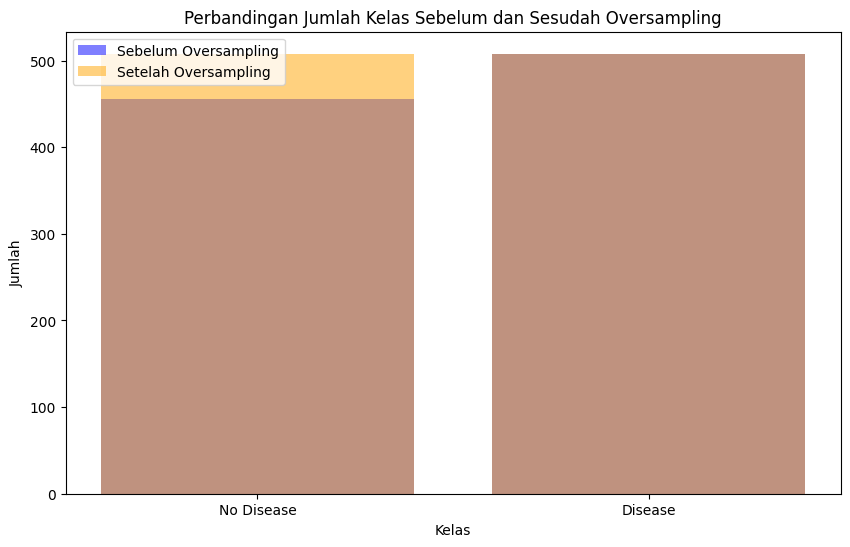

In [ ]:
# Visualisasi
# Hitung jumlah kelas sebelum oversampling
count_before = data_heart['target'].value_counts()

# Hitung jumlah kelas setelah oversampling
count_after = data_heart_resampled['target'].value_counts()

# Plot diagram batang
plt.figure(figsize=(10, 6))
plt.bar(count_before.index, count_before.values, color='blue', alpha=0.5, label='Sebelum Oversampling')
plt.bar(count_after.index, count_after.values, color='orange', alpha=0.5, label='Setelah Oversampling')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.title('Perbandingan Jumlah Kelas Sebelum dan Sesudah Oversampling')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.legend()
plt.show()

> **Interpretasi**: Sebelum dilakukan balancing data, proporsi pasien dengan penyakit adalah 508, sedang pasien tanpa penyakit jantung adalah 456. Setelah dilakukan balancing data, proporsi pasien dengan penyakit jantung dan tanpa penyakit jantung sama-sama berjumlah 508 pasien.

## **1.5 Feature Encoding**
Karena seluruh data pada data heart disease sudah berupa angka, maka tidak diperlukan feature encoding.

# **2. Exploratory Data Analysis (EDA)**

## 2.1 Mengelaborasi features dan tipe data

In [ ]:
# Mengecek informasi data
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       964 non-null    int64  
 1   sex       964 non-null    int64  
 2   cp        964 non-null    int64  
 3   trestbps  964 non-null    int64  
 4   chol      964 non-null    int64  
 5   fbs       964 non-null    int64  
 6   restecg   964 non-null    int64  
 7   thalach   964 non-null    int64  
 8   exang     964 non-null    int64  
 9   oldpeak   964 non-null    float64
 10  slope     964 non-null    int64  
 11  ca        964 non-null    int64  
 12  thal      964 non-null    int64  
 13  target    964 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 113.0 KB


In [ ]:
# Menampilkan deskripsi statistik
data_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000
mean,54.057054,0.714730,0.964730,129.957469,242.134855,0.141079,0.524896,149.506224,0.328838,0.986203,1.415975,0.738589,2.310166,0.526971
std,9.142455,0.451777,1.029574,15.321181,45.094967,0.348284,0.513982,22.721506,0.470035,1.052420,0.599579,1.017053,0.618393,0.499531
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,209.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.750000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,271.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Identifikasi tipe data
data_heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

> **Interpretasi:**
> Seluruh fiture merupakan fitur numerik. Fitur age, sex, cp, trestbps, chol, fbs. restecg, thalach, exang, slop, ca, thal, targer memiliki tipe data integer, sedangkan fitur oldpeak memiliki tipe data float.

In [ ]:
# Nilai unik
for column in data_heart.columns:
    print(f"Fitur {column} memiliki {data_heart[column].nunique()} nilai unik.")

Fitur age memiliki 41 nilai unik.
Fitur sex memiliki 2 nilai unik.
Fitur cp memiliki 4 nilai unik.
Fitur trestbps memiliki 42 nilai unik.
Fitur chol memiliki 143 nilai unik.
Fitur fbs memiliki 2 nilai unik.
Fitur restecg memiliki 3 nilai unik.
Fitur thalach memiliki 88 nilai unik.
Fitur exang memiliki 2 nilai unik.
Fitur oldpeak memiliki 37 nilai unik.
Fitur slope memiliki 3 nilai unik.
Fitur ca memiliki 5 nilai unik.
Fitur thal memiliki 4 nilai unik.
Fitur target memiliki 2 nilai unik.


**Tipe Data**
*   Nominal : tipe data yang berupa label/nama, tidak dapat diurut dan diukur. Fitur yang memiliki tipe data nominal adalah **sex**, **fbs**, **exang**, **slope**, **ca**, **thal**, dan **target**.
*   Ordinal : tipe data dengan urutan tertentu. Fitur yang memiliki tipe data ordinal adalah **cp** dan **restecg**.
*   Numerik : semua jenis data yang berisi angka. Fitur yang memiliki tipe data numerik adalah **age**, **trestbps**, **chol**, **thalach**, **oldspeak**.



**<h1>Visualisasi Features</h1>**
Akan dilakukan eksplorasi data dengan melihat visualisasi data secara univariate dan bi-/multivariate pada beberapa fitur.

<h2>a. Visualisasi Univariate</h2>


 Total Jenis Kelamin 



<ipython-input-26-f05b90f66a42>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-26-f05b90f66a42>:20: UserWarning:

FixedFormatter should only be used together with FixedLocator



sex
Male      689
Female    275
Name: count, dtype: int64

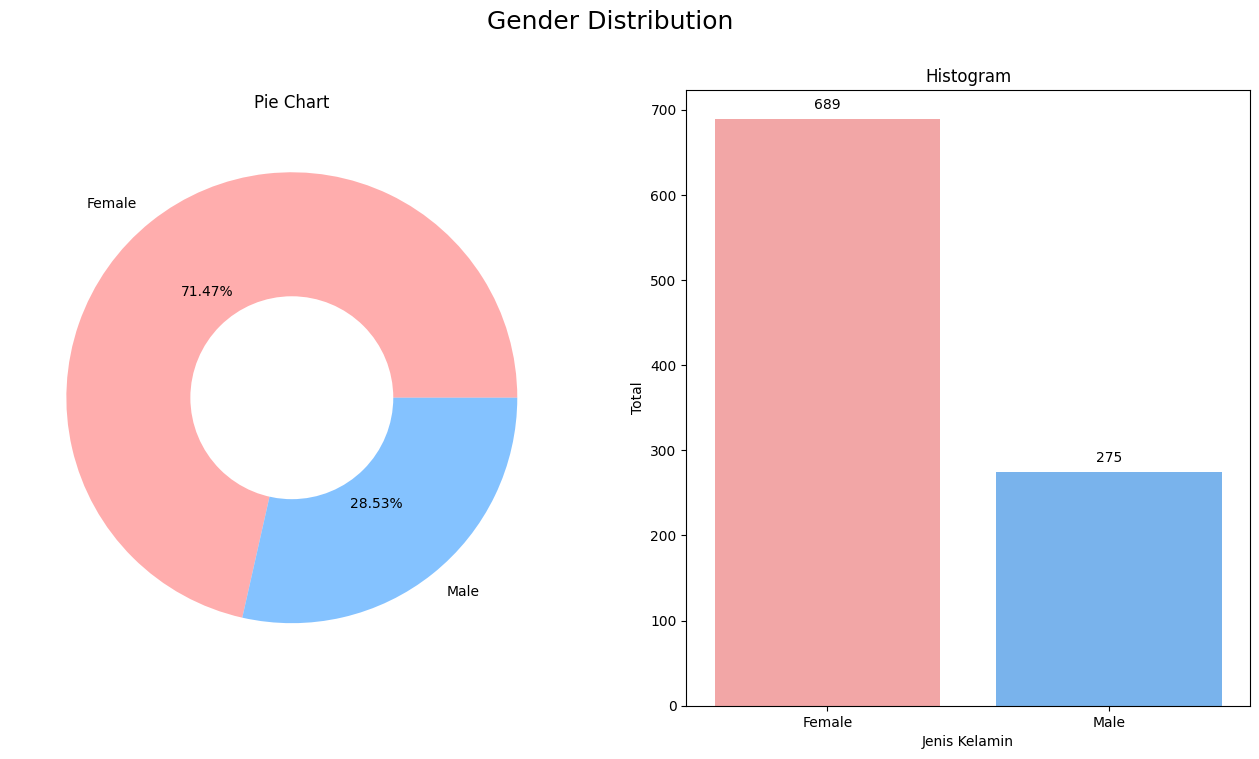

In [ ]:
# Sex (jenis kelamin)
plt.figure(figsize=(16, 8))
plt.suptitle('Gender Distribution', fontsize=18)

# Subplot 1 Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart')
plt.pie(data_heart['sex'].value_counts(), labels=['Female', 'Male'], autopct='%.2f%%', colors=['#FF9999', '#66B3FF'], wedgeprops=dict(alpha=0.8))
centre = plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# Subplot 2 Histogram
plt.subplot(1, 2, 2)
plt.title('Histogram')
ax = sns.countplot(x='sex', data=data_heart, order=data_heart['sex'].value_counts().index, palette=['#FF9999', '#66B3FF'])
for p in ax.patches:
    ax.annotate(f'{int(round(p.get_height()))}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Total')
ax.set_xticklabels(['Female', 'Male'])  # Mengatur label sumbu x

# Menghilangkan warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", message="FixedFormatter should only be used together with FixedLocator")

# Syntax Anda di sini

# Menghitung Label Kategorikal tanpa Menghapus Nilai Null
print('\n Total Jenis Kelamin \n')
data_heart['sex'].replace({0: 'Female', 1: 'Male'}).value_counts(dropna=False)


> **Interpretasi:** Grafik batang menunjukkan bahwa pasien didominasi oleh pasien wanita sebesar 71.47%, sedangkan 28.53% adalah pasien pria.


 Tipe Penyakit Jantung Total 



cp
0    454
2    272
1    164
3     74
Name: count, dtype: int64

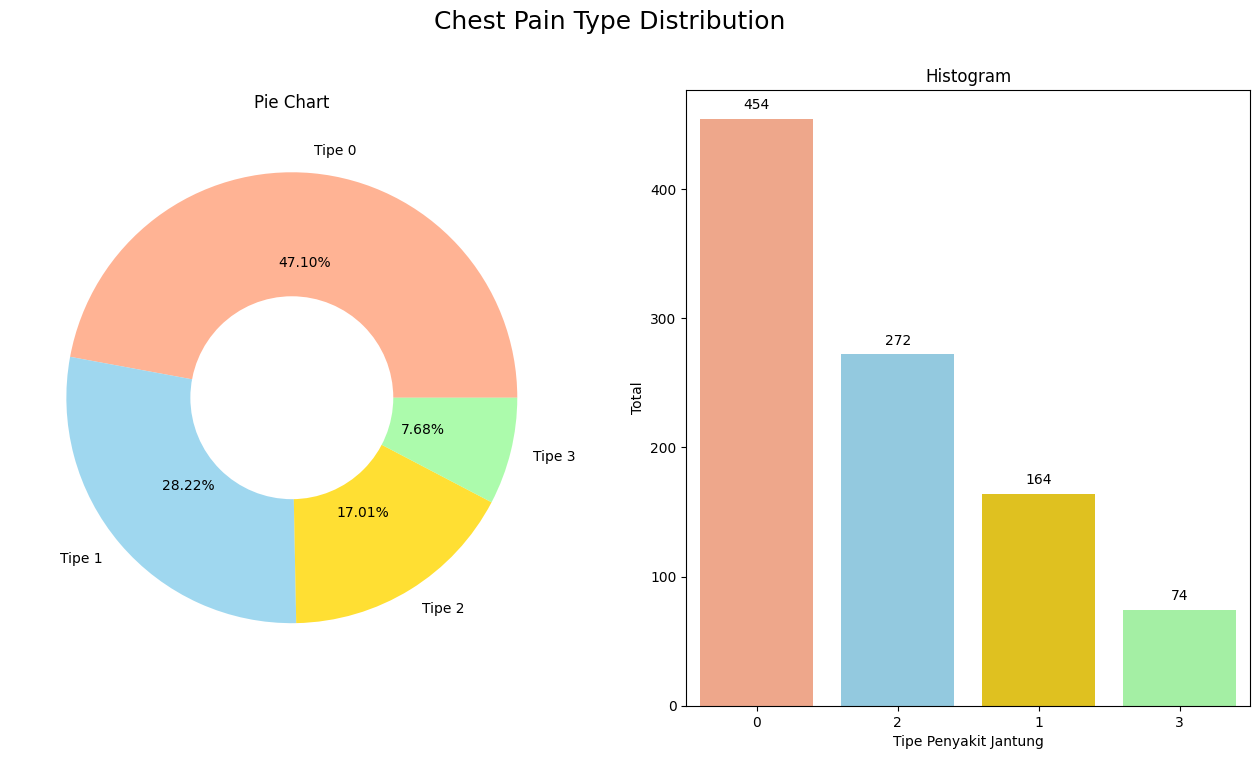

In [ ]:
# cp (Chest Pain Type)
labels = ['Tipe 0', 'Tipe 1', 'Tipe 2', 'Tipe 3']
order = data_heart['cp'].value_counts().index

plt.figure(figsize=(16, 8))
plt.suptitle('Chest Pain Type Distribution', fontsize=18)

# Subplot 1 Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart')
plt.pie(data_heart['cp'].value_counts(), labels=labels, autopct='%.2f%%', colors=['#FFA07A', '#87CEEB', '#FFD700', '#98FB98'], wedgeprops=dict(alpha=0.8))
centre = plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# Subplot 2 Histogram
plt.subplot(1, 2, 2)
plt.title('Histogram')
ax = sns.countplot(x='cp', data=data_heart, order=order, palette=['#FFA07A', '#87CEEB', '#FFD700', '#98FB98'])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Tipe Penyakit Jantung')
plt.ylabel('Total')

# Menghilangkan warning
warnings.filterwarnings("ignore", category=FutureWarning)

# Menghitung Label Kategorikal tanpa Menghapus Nilai Null
print('\n Tipe Penyakit Jantung Total \n')
data_heart['cp'].value_counts(dropna=False)

> **Interpretasi:** Dari 964 pasien, sebesar 47.1% pasienmenderita nyeri dada tipe 0, sebesar 28.22% pasien menderita nyeri dada tipe 1, sebesar 17.01% pasien menderita nyeri dada tipe 2, dan sebesar 7.08% pasien menderita nyeri dada tipe 3.


 Total Gula Darah



fbs
0    828
1    136
Name: count, dtype: int64

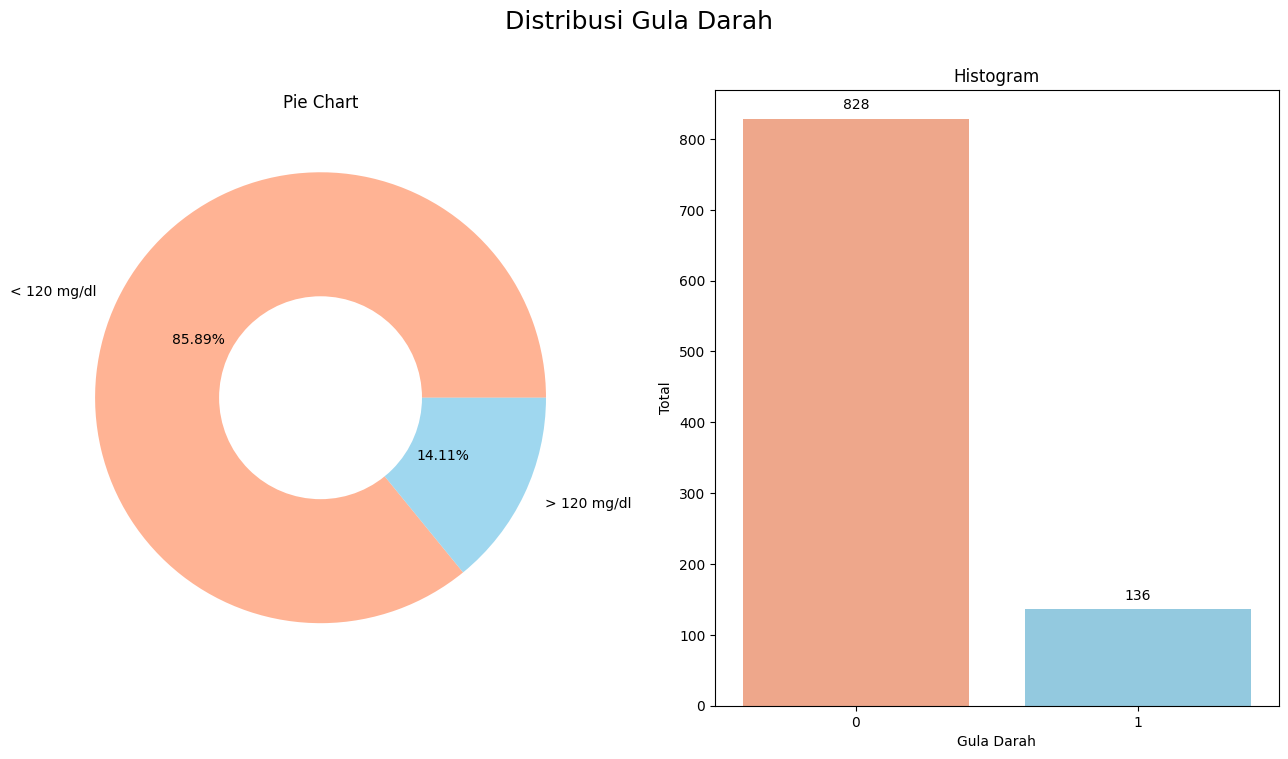

In [ ]:
# fbs (Fasting Blood Sugar)
labels = ['< 120 mg/dl', '> 120 mg/dl']
order = data_heart['fbs'].value_counts().index

plt.figure(figsize=(16, 8))
plt.suptitle('Distribusi Gula Darah', fontsize=18)

# Subplot 1 Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart')
colors_pie = ['#FF69B4', '#87CEEB']
plt.pie(data_heart['fbs'].value_counts(), labels=labels, autopct='%.2f%%', colors=['#FFA07A','#87CEEB'], wedgeprops=dict(alpha=0.8))
centre = plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# Subplot 2 Histogram
plt.subplot(1, 2, 2)
plt.title('Histogram')
colors_hist = ['#FF69B4', '#87CEEB']
ax = sns.countplot(x='fbs', data=data_heart, order=order, palette=['#FFA07A','#87CEEB'])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Gula Darah')
plt.ylabel('Total')

# Menghilangkan warning
warnings.filterwarnings("ignore", category=FutureWarning)

# Menghitung Label Kategorikal tanpa Menghapus Nilai Null
print('\n Total Gula Darah\n')
data_heart['fbs'].value_counts(dropna=False)

> **Interpretasi:** Dari 964 pasien, sebesar 85,89% pasien memiliki gula darah kurang dari 120 mg/dl, sedangkan sebesar 14.11% pasien memiliki gula darah di atas 120 mg/dl.


 Total Slope 



slope
2    457
1    451
0     56
Name: count, dtype: int64

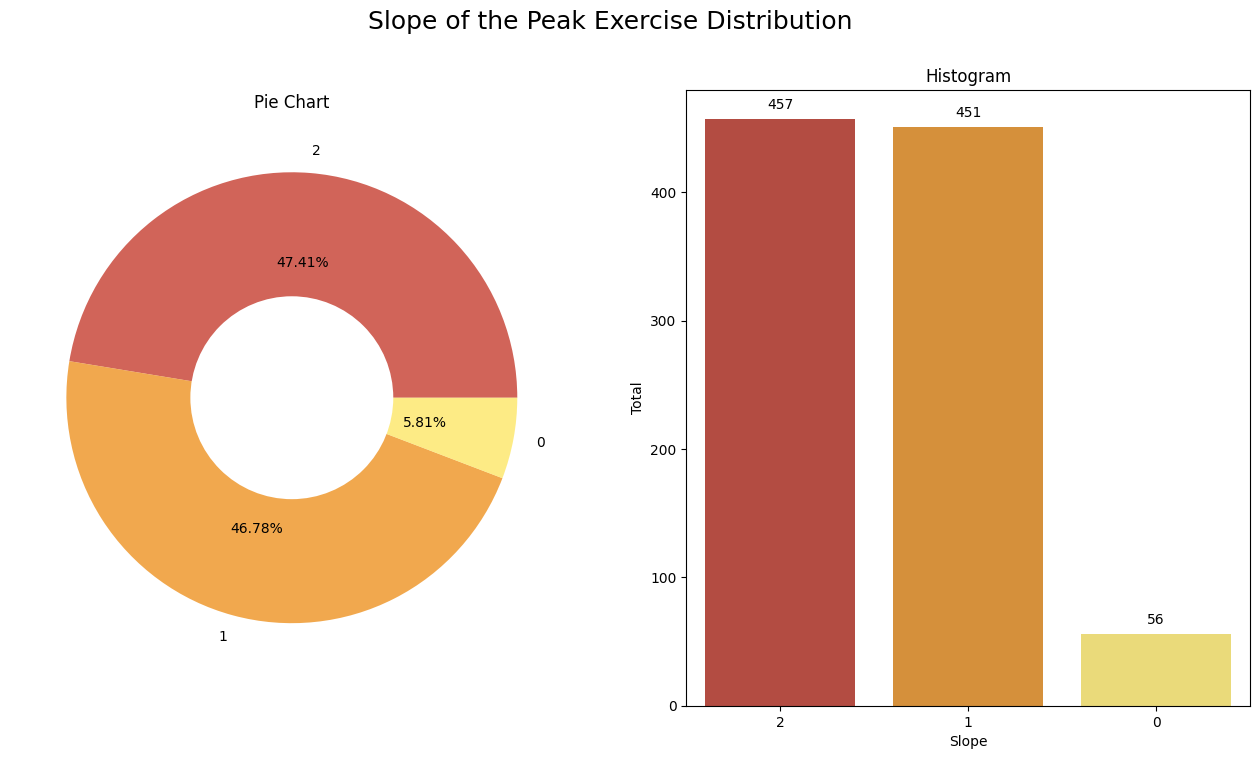

In [ ]:
# slope (Slope of the Peak Exercise)
labels=['2', '1', '0']
order=data_heart['slope'].value_counts().index

plt.figure(figsize=(16, 8))
plt.suptitle('Slope of the Peak Exercise Distribution', fontsize=18)

# Subplot 1 Pie Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart')
plt.pie(data_heart['slope'].value_counts(), labels=labels, autopct='%.2f%%', colors=['#C63D2F','#EE9322','#FDE767'], wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# Subplot 2 Histogram
plt.subplot(1, 2, 2)
plt.title('Histogram')
ax = sns.countplot(x='slope', data=data_heart, order=order, palette=['#C63D2F','#EE9322','#FDE767'])
for p in ax.patches:
    ax.annotate(f'{int(round(p.get_height()))}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Slope')
plt.ylabel('Total')

# Menghilangkan warning
warnings.filterwarnings("ignore", category=FutureWarning)

# Menghitung Label Kategorikal tanpa Menghapus Nilai Null
print('\n Total Slope \n')
data_heart['slope'].value_counts(dropna=False)


> **Interpretasi:** Dari 964 pasien, sebesar 47.41% pasien memiliki tipe slope 2, sebesar 46.78% pasien memiliki tipe slope 1, dan sebesar 5.81% pasien memiliki tipe slope 0

<h2> Visualisasi Bi-/Multivariate </h2>

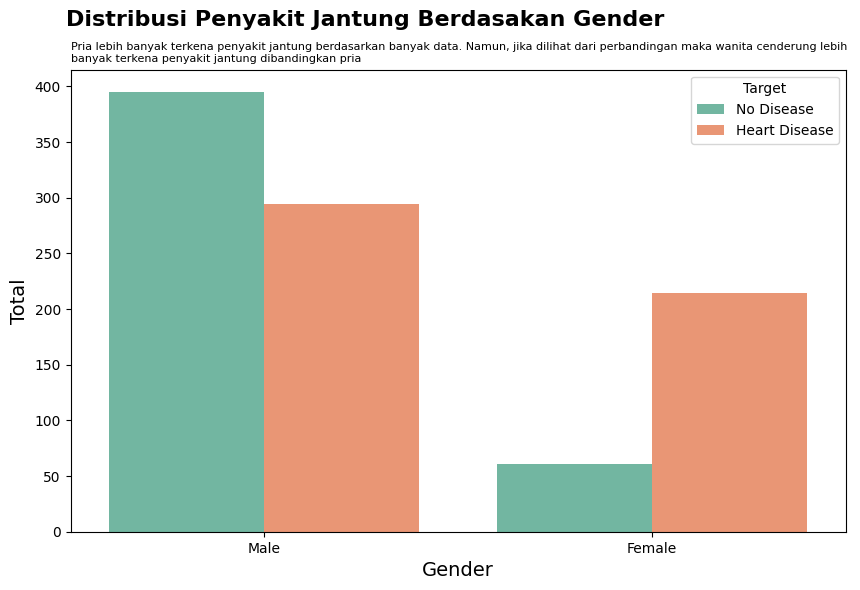

In [ ]:
# Bar chart untuk distribusi target berdasarkan jenis kelamin

plt.figure(figsize=(10, 6))
sns.countplot(x=data_heart['sex'].replace({0: 'Female', 1: 'Male'}), hue=data_heart['target'], palette='Set2')

plt.suptitle('Distribusi Penyakit Jantung Berdasakan Gender', fontweight='heavy',
             x=0.12, y=0.98, ha='left', fontsize=16, fontfamily='sans-serif')  # Anda dapat menyesuaikan nilai x di sini
plt.title('Pria lebih banyak terkena penyakit jantung berdasarkan banyak data. Namun, jika dilihat dari perbandingan maka wanita cenderung lebih \nbanyak terkena penyakit jantung dibandingkan pria',
          fontsize=8, fontfamily='sans-serif', loc='left')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Total', fontsize=14)
plt.legend(title='Target', labels=['No Disease', 'Heart Disease'])

plt.show()

>**Interpretasi:**
Grafik menunjukkan bahwa pria lebih banyak terkena penyakit jantung berdasarkan banyak data. Namun, jika dilihat dari perbandingan maka wanita cenderung lebih banyak terkena penyakit jantung dibandingkan pria.

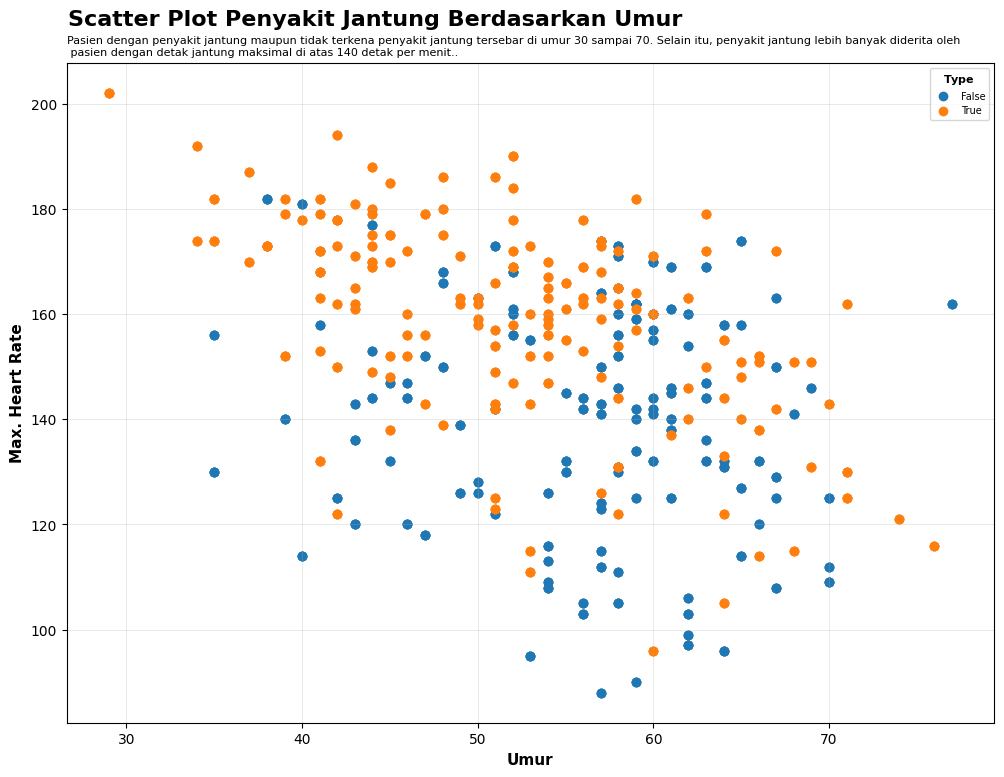

In [ ]:
# Scatter Plot Penyakit Jantung Berdasarkan Umur

plt.figure(figsize=(10, 8))
plt.suptitle('Scatter Plot Penyakit Jantung Berdasarkan Umur', fontweight='heavy',
             x=0.048, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')

plt.title('Pasien dengan penyakit jantung maupun tidak terkena penyakit jantung tersebar di umur 30 sampai 70. Selain itu, penyakit jantung lebih banyak diderita oleh \n pasien dengan detak jantung maksimal di atas 140 detak per menit..',
          fontsize='8', fontfamily='sans-serif', loc='left')

plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# Membuat Scatter Plot
plt.scatter(x=data_heart.age[data_heart.target==0], y=data_heart.thalach[(data_heart.target==0)])
plt.scatter(x=data_heart.age[data_heart.target==1], y=data_heart.thalach[(data_heart.target==1)])

# Legend Scatter Plot Legend dan Setting Label
plt.legend(['False', 'True'], title='$\\bf{Type}$', fontsize='7',
           title_fontsize='8', loc='upper right', frameon=True)

plt.xlabel('Umur', fontweight='bold', fontsize='11',
           fontfamily='sans-serif')

plt.ylabel('Max. Heart Rate', fontweight='bold', fontsize='11',
           fontfamily='sans-serif')

plt.ticklabel_format(style='plain', axis='both')
plt.grid(axis='both', alpha=0.4, lw=0.5)
plt.show();


**Interpretasi:** Berdasarkan scatter plot, pasien dengan penyakit jantung maupun tidak terkena penyakit jantung tersebar di umur 30 sampai 70. Selain itu, penyakit jantung lebih banyak diderita oleh pasien dengan detak jantung maksimal di atas 140 detak per menit.

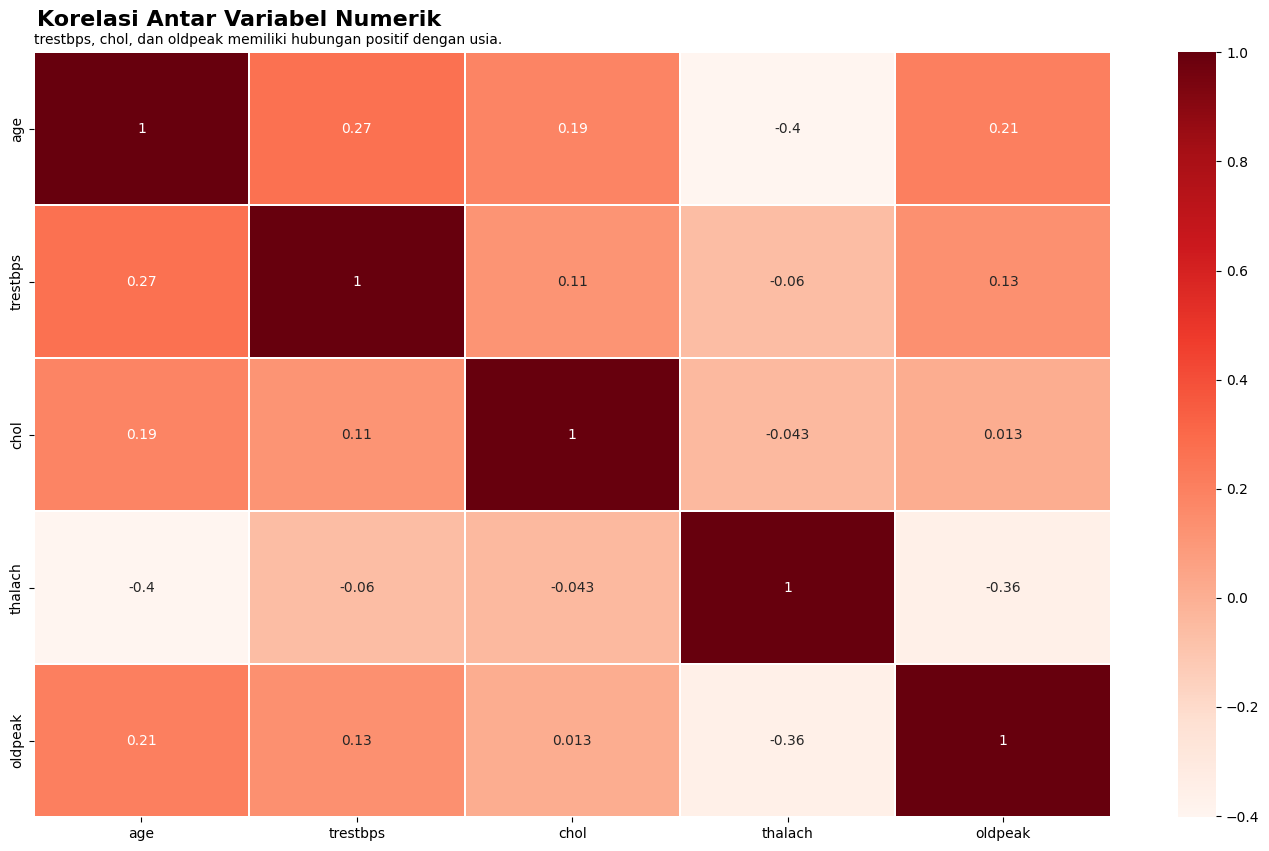

In [ ]:
# Korelasi dengan Heatmap

plt.figure(figsize=(14, 9))

sns.heatmap(data_heart[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].corr(), annot=True, cmap='Reds', linewidths=0.1)

plt.suptitle('Korelasi Antar Variabel Numerik', fontweight='heavy',
             x=0.03, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')

plt.title('trestbps, chol, dan oldpeak memiliki hubungan positif dengan usia.',
          fontsize='10', fontfamily='sans-serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

**Interpretasi:**
trestbps, chol, dan oldpeak memiliki hubungan positif dengan usia, semakin besar umur maka trestbps, chol, dan oldpeak juga semakin meningkat.
Thalach memiliki hubungan negatif dengan usia, semakin besar usia maka thalach akan semakin menurunt.

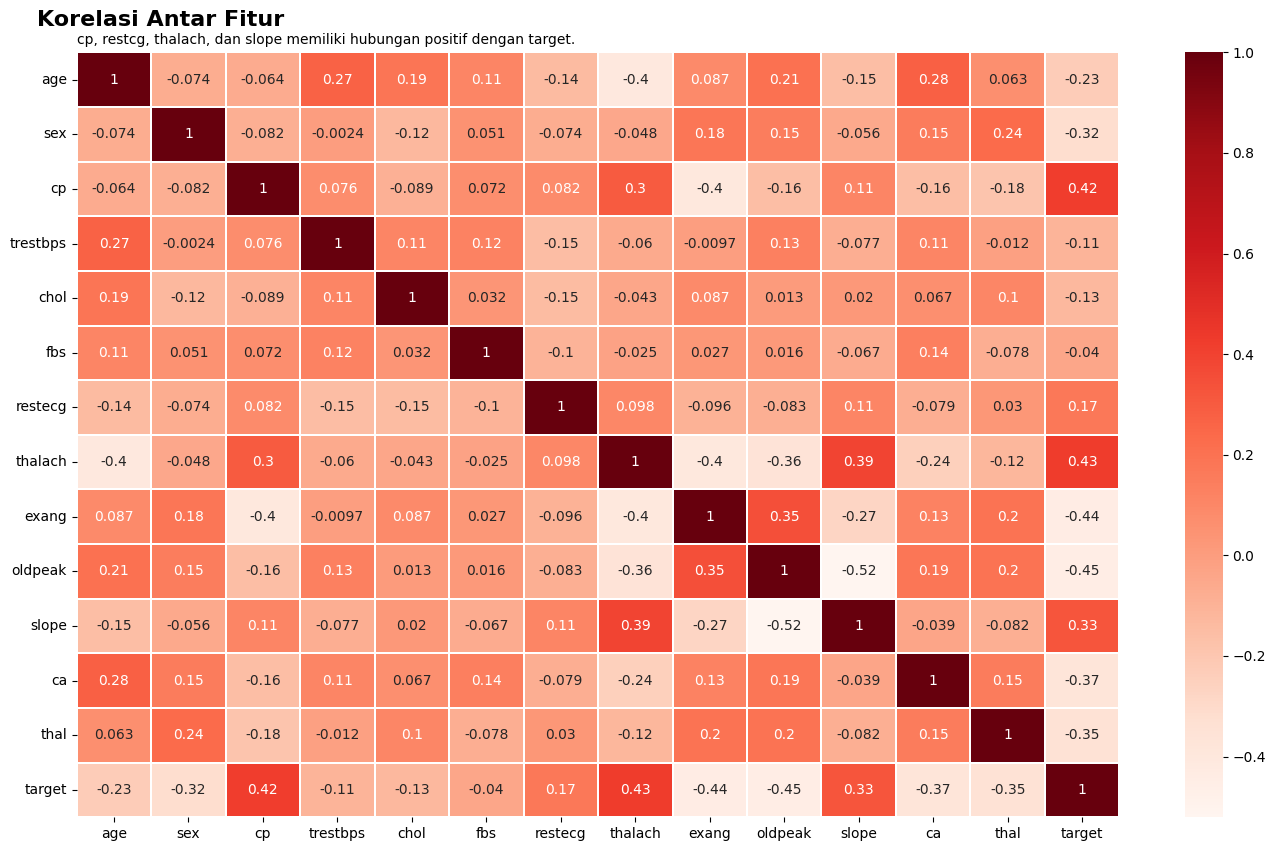

In [ ]:
# Korelasi Antar Fitur dengan Heatmap

plt.figure(figsize=(14, 9))

sns.heatmap(data_heart[['age', 'sex','cp', 'trestbps', 'chol','fbs', 'restecg','thalach','exang', 'oldpeak','slope',	'ca',	'thal',	'target']].corr(), annot=True, cmap='Reds', linewidths=0.1)

plt.suptitle('Korelasi Antar Fitur', fontweight='heavy',
             x=0.03, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')

plt.title('cp, restcg, thalach, dan slope memiliki hubungan positif dengan target.',
          fontsize='10', fontfamily='sans-serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

**Interpretasi:**
**cp, restcg, thalach, dan slope** memiliki hubungan positif dengan target, semakin besar cp, restcg, thalach, dan slope maka akan berpengaruh pada kemungkinan menderita penyakit jantung.
Fitur yang tidak berpengaruh terhadap target adalah fbs karena memiliki nilai korelasi yang lemah.

## **2.2 Menjelaskan Kondisi dan Perbedaan Penggunaan Mean, Median, dan Modus**

*   Mean merupakan nilai rata-rata dari sejumlah data. Mean sangat dipengaruhi oleh nilai esktrim atau outlier dalam data. Mean biasa digunakan ketika distribusi data normal/simetris

*   Median merupakan nilai tengah dalam data yang diurutkan. Median kurang dipengaruhi oleh nilai ekstrim dibandingkan dengan mean sehingga lebih stabil dalam kasus adanya outlier. Median biasanya digunakan ketika distribusi data tidak simetris atau mengandung outlier.

*   Modus merupakan nilai yang paling sering muncul dalam data. Modus digunakan untuk menggambarkan nilai yang paling umum atau dominan dalam distribusi data, Moduks sering digunakan dalam data kategorikal.




## **2.3 Menemukan dan Mendeskripsikan Statistical Five Sumarries**
Statistical five summaries (ringkasan lima  angka) dapat diketahui dengan mengidentifikasi boxplot dari feature bertipe data numerik. Ringkasan 5 angka meliputi:
*   Median
*   Kuartil 1
*   Kuartil 3
*   Data terendah
*   Data tertinggi



In [ ]:
# Boxplot Tekanan Darah (trestbps)
fig1 = px.box(data_heart, x='trestbps', points="all", title='<b>Boxplot Tekanan Darah<b>', color_discrete_sequence=['#D37676'])
fig1.show()

Ringkasan Lima Angka Fitur Tekanan Darah (trestbps)
* Median    : 130 mm/Hg
* Kuartil 1 : 120 mm/Hg
* Kuartil 3 : 140 mm/Hg
* Minimal   : 94 mm/Hg
* Maksimal  : 170 mm/Hg

In [ ]:
# Boxplot tingkat kolesterol (chol)
fig2 = px.box(data_heart, x='chol', points="all", title='<b>Boxplot Kolesterol<b>', color_discrete_sequence=["#756AB6"])
fig2.show()

Ringkasan Lima Angka Fitur Kolesterol (chol)
* Median    : 239 mg/dl
* Kuartil 1 : 209 mg/dl
* Kuartil 3 : 271 mg/dl
* Minimal   : 126 mg/dl
* Maksimal  : 360 mg/dl

In [ ]:
# Boxplot denyut jantung maksimal (thalach)
fig3 = px.box(data_heart, x='thalach', points="all", title='<Boxplot Thalac<b>', color_discrete_sequence=['#638889'])
fig3.show()

Ringkasan Lima Angka Fitur Denyut Jantung Maksimal (thalach)
* Median    : 152 bpm
* Kuartil 1 : 132 bpm
* Kuartil 3 : 168 bpm
* Minimal   : 88 bpm
* Maksimal  : 202 bpm

In [ ]:
# Boxplot oldpeak
fig4 = px.box(data_heart, x='oldpeak', points="all", title='<b>Boxplot Oldpeak<b>', color_discrete_sequence=['#776B5D'])
fig4.show()

Ringkasan Lima Angka oldpeak
* Median    : 0.75
* Kuartil 1 : 0
* Kuartil 3 : 1.6
* Minimal   : 0
* Maksimal  : 4.2

## **2.4 Mendeskripsikan Distribusi Data**

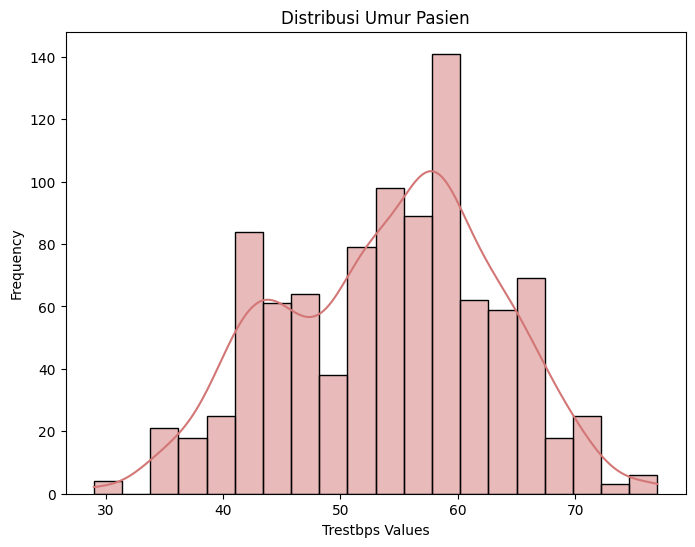

In [ ]:
# Distribusi untuk age
plt.figure(figsize=(8, 6))
sns.histplot(data_heart['age'], bins=20, kde=True, color='#D37676', edgecolor='black')
plt.title('Distribusi Umur Pasien')
plt.xlabel('Trestbps Values')
plt.ylabel('Frequency')
plt.show()

> **Interpretasi:**
Distribusi data pada feature age yaitu cederung normal atau no skewed



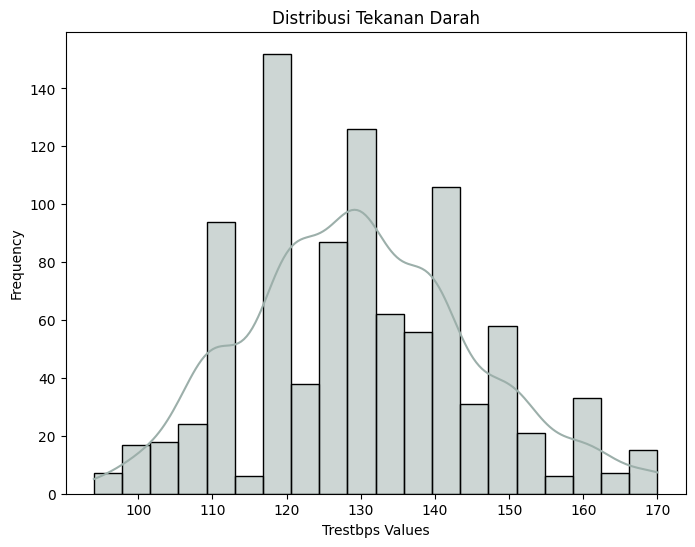

In [ ]:
# Histogram untuk trestbps
plt.figure(figsize=(8, 6))
sns.histplot(data_heart['trestbps'], bins=20, kde=True, color='#9CAFAA', edgecolor='black')
plt.title('Distribusi Tekanan Darah')
plt.xlabel('Trestbps Values')
plt.ylabel('Frequency')
plt.show()


> **Intepretasi:** Distribusi data pada feature trestbps atau tekanan darah pasien yaitu cenderung atau no skewed.

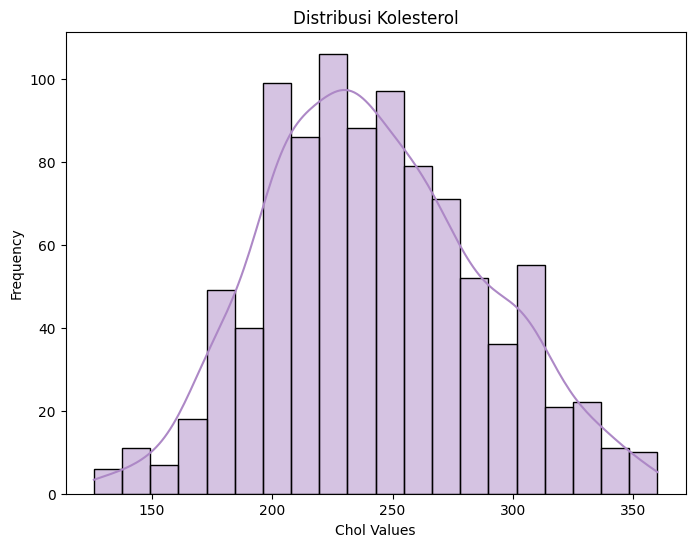

In [ ]:
# Distribusi untuk chol
plt.figure(figsize=(8, 6))
sns.histplot(data_heart['chol'], bins=20, kde=True, color='#AD88C6', edgecolor='black')
plt.title('Distribusi Kolesterol')
plt.xlabel('Chol Values')
plt.ylabel('Frequency')
plt.show()

> **Interpretasi:** Distribusi data pada feature chol atau kolesterol yaitu cenderung normal atau no skewed.

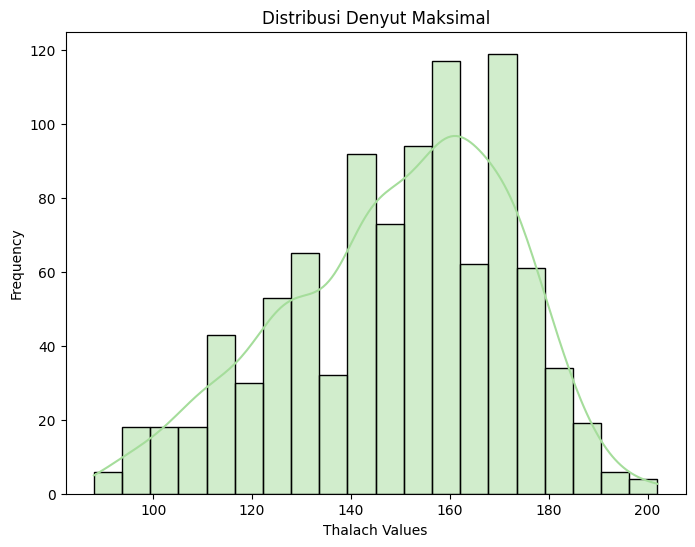

In [ ]:
# Distribusi untuk thalach
plt.figure(figsize=(8, 6))
sns.histplot(data_heart['thalach'], bins=20, kde=True, color='#A5DD9B', edgecolor='black')
plt.title('Distribusi Denyut Maksimal')
plt.xlabel('Thalach Values')
plt.ylabel('Frequency')
plt.show()

> **Interpretasi:** Distribusi data pada feature denyut maksimal atau thalach yaitu condong ke kiri atau left skewed.

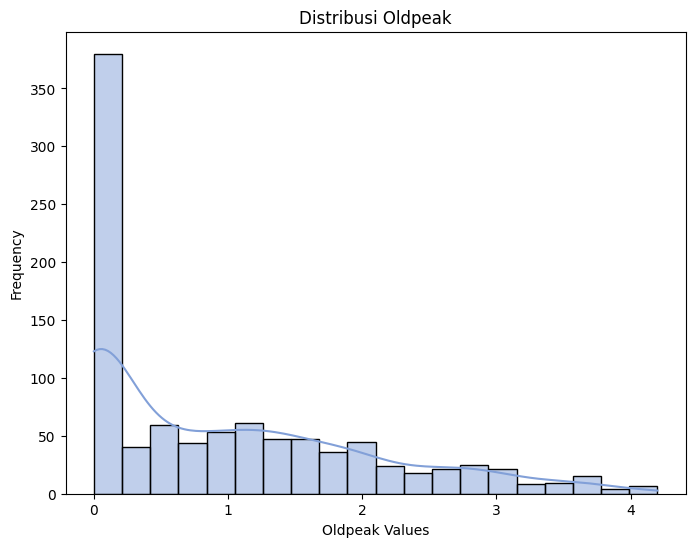

In [ ]:
# Distribusi untuk oldpeak
plt.figure(figsize=(8, 6))
sns.histplot(data_heart['oldpeak'], bins=20, kde=True, color='#82A0D8', edgecolor='black')
plt.title('Distribusi Oldpeak')
plt.xlabel('Oldpeak Values')
plt.ylabel('Frequency')
plt.show()

> **Interpretasi:** Distribusi data pada feature 'oldpeak' yaitu condong ke kanan atau right skewed.

# **3. Feature Engineering**

## **3.1 Rasio Kolesterol dan Tekanan Darah**

In [ ]:
# rasio kolesterol dan tekanan darah
data_heart['cholesterol_to_hdl_ratio'] = data_heart['chol'] / data_heart['trestbps']
data_heart[['chol','trestbps','cholesterol_to_hdl_ratio']]

,chol,trestbps,cholesterol_to_hdl_ratio
0,212,125,1.696000
1,203,140,1.450000
2,174,145,1.200000
3,203,148,1.371622
4,294,138,2.130435
...,...,...,...
1020,221,140,1.578571
1021,258,125,2.064000
1022,275,110,2.500000
1023,254,110,2.309091


> Dengan mengetahui rasio antara kolesterol dan tekanan darah, kita dapat meilihat seberapa besar pengaruh tekanan daran terhadap tingkat kolesterol dalam tubuh. Rasio cholsterol_to_hdl_ratio yang lebih tinggi menunjukkan risiko masalah kesehatan jantung yang lebih besar karena terdapat penumpukan kolesterol yang tinggi.

## **3.2 Rasio Tekanan Darah Terhadap Usia**

In [ ]:
# rasio tekanan darah terhadap usia
data_heart['age_to_blood_pressure_ratio'] = data_heart['trestbps'] / data_heart['age']
data_heart[['trestbps','age','age_to_blood_pressure_ratio']]

,trestbps,age,age_to_blood_pressure_ratio
0,125,52,2.403846
1,140,53,2.641509
2,145,70,2.071429
3,148,61,2.426230
4,138,62,2.225806
...,...,...,...
1020,140,59,2.372881
1021,125,60,2.083333
1022,110,47,2.340426
1023,110,50,2.200000


> Fitur age_to_blood_pressure_ratio memberikan informasi tentang seberapa besar tekanan darah relatif terhadap usia seseorang. Semakin tinggi nilai rasio maka semakin tinggi tekanan darah relatif terhadap usia yang menjadi indikasi resiko penyakit jantung

## **3.3 Rasio Denyut Jantung Maksimal**

In [ ]:
data_heart['max_heart_rate_per_age'] = data_heart['thalach'] / data_heart['age']
data_heart[['age','thalach','max_heart_rate_per_age']]

,age,thalach,max_heart_rate_per_age
0,52,168,3.230769
1,53,155,2.924528
2,70,125,1.785714
3,61,161,2.639344
4,62,106,1.709677
...,...,...,...
1020,59,164,2.779661
1021,60,141,2.350000
1022,47,118,2.510638
1023,50,159,3.180000


> Fitur ini memberikan informasi tentang seberapa efisien jantung seseorang dalam berdetak seiring bertambahnya usia. Jika rasio rendah, maka mengindikasikan adanya masalah kesehatan jantung yang perlu ditangani, sedangkan rasio yang tinggi menunjukkan kondisi jantung yang lebih sehat



## **3.4 Kategori Usia Pasien**

In [ ]:
# Definisikan bins dan label sebagai kelompok
bins = [0, 29, 45, 60, 100]
labels = ['young', 'adult', 'middle-aged', 'elderly']
data_heart['age_category'] = pd.cut(data_heart['age'], bins=bins, labels=labels)

data_heart[['age', 'age_category']]

,age,age_category
0,52,middle-aged
1,53,middle-aged
2,70,elderly
3,61,elderly
4,62,elderly
...,...,...
1020,59,middle-aged
1021,60,middle-aged
1022,47,middle-aged
1023,50,middle-aged




> Fitur ini  memberikan informasi pembagian kategori usia berdasarkan rentang tertentu
* young = 0 - 29 tahun
* adult = 30 - 45 tahun
* paruh baya = 46 - 60 tahun
* lanjut usia = 61 - 100 tahun

## **3.5 Kategori Tekanan Darah**

In [ ]:
# Membuat fungsi fitur trestbps category
def categorize_trestbps(trestbps):
    if trestbps < 120:
        return 'Normal'
    elif 120 <= trestbps < 140:
        return 'Elevated'
    else:
        return 'High'

# Menerapkan fungsi
data_heart['trestbps_category'] = data_heart['trestbps'].apply(categorize_trestbps)
data_heart[['trestbps','trestbps_category']]

,trestbps,trestbps_category
0,125,Elevated
1,140,High
2,145,High
3,148,High
4,138,Elevated
...,...,...
1020,140,High
1021,125,Elevated
1022,110,Normal
1023,110,Normal


> Fitur trestbps_category mengelompokkan angka tekanan darah (trestbps) ke dalam kategori berdasarkan rentang tertentu.
* Normal = kurang dari 120 mm/Hg
* Elevated = 120 - 140 mm/Hg
* High = lebih dari 140 mm/Hg

## **3.6 Level Kolesterol**

In [ ]:
# Membuat fungsi fitur cholesterol level
def categorize_chol_level(chol):
    if chol < 200:
        return 'Normal'
    elif 200 <= chol < 240:
        return 'Above Normal'
    else:
        return 'High'

# Menerapkan fungsi
data_heart['chol_level'] = data_heart['chol'].apply(categorize_chol_level)
data_heart[['chol','chol_level']]

,chol,chol_level
0,212,Above Normal
1,203,Above Normal
2,174,Normal
3,203,Above Normal
4,294,High
...,...,...
1020,221,Above Normal
1021,258,High
1022,275,High
1023,254,High


> Fitur chol_level mengelompokan kolesterol (chol) ke dalam kategori berdasarkan rentang tertentu.
* Normal = kurang dari 200 mg/dl
* Above Normal = 200 - 240 mg/dl
* High = lebih dari 240 mg/dl

## **3.7 Kategori Detak Jantung Maksimal**

In [ ]:
# Membuat fungsi fitur heart rate category
def categorize_heart_rate(thalach):
    if thalach < 100:
        return 'Resting'
    elif 100 <= thalach < 120:
        return 'Fat-Burning'
    elif 120 <= thalach < 150:
        return 'Aerobic'
    else:
        return 'Anaerobic'

# Menerapkan fungsi
data_heart['category_heart_rate'] = data_heart['thalach'].apply(categorize_heart_rate)
data_heart[['thalach','category_heart_rate']]

,thalach,category_heart_rate
0,168,Anaerobic
1,155,Anaerobic
2,125,Aerobic
3,161,Anaerobic
4,106,Fat-Burning
...,...,...
1020,164,Anaerobic
1021,141,Aerobic
1022,118,Fat-Burning
1023,159,Anaerobic


> Fitur category_heart_rate mengelompokan nilai denyut jantung (thalach) ke dalam kategori tertentu berdasarkan rentang yang ditentukan.
* Resting = < 100 bpm
* Fat-burning = 100 - 119 bpm
* Aerobic = 120 - 149 bpm
* Anaerobic = > 150 bpm

## **3.8 Kategori Depresi ST 'Oldpeak'**

In [ ]:
# Membuat fungsi fitur oldpeak category
def categorize_oldpeak(oldpeak):
    if oldpeak < 1:
        return 'Normal'
    elif 1 <= oldpeak < 2:
        return 'Mild'
    elif 2 <= oldpeak < 3:
        return 'Moderate'
    else:
        return 'Severe'

# Menerapkan fungsi
data_heart['category_oldpeak'] = data_heart['oldpeak'].apply(categorize_oldpeak)
data_heart[['oldpeak','category_oldpeak']]

,oldpeak,category_oldpeak
0,1.0,Mild
1,3.1,Severe
2,2.6,Moderate
3,0.0,Normal
4,1.9,Mild
...,...,...
1020,0.0,Normal
1021,2.8,Moderate
1022,1.0,Mild
1023,0.0,Normal


> Fitur category_oldpeak mengelompokan nilai ST depression ke dalam kategori tertentu.
* Normal = < 0.5
* Mild = 0.5 - 0.99
* Moderate = 1 - 1.99
* Severe = > 1.99

## **3.9 Kategori Hasil Pemeriksaan Elektrokardiogram**

In [ ]:
# Membuat fungsi resting ecg category
def categorize_resting_ecg(restecg):
    if restecg == 0:
        return 'Normal'
    elif restecg == 1:
        return 'Abnormality'
    elif restecg == 2:
        return 'Left Ventricular Hypertrophy'
    else:
        return 'Unknown'

# Menerapkan fungsi
data_heart['category_resting_ecg'] = data_heart['restecg'].apply(categorize_resting_ecg)
data_heart[['restecg', 'category_resting_ecg']]

,restecg,category_resting_ecg
0,1,Abnormality
1,0,Normal
2,1,Abnormality
3,1,Abnormality
4,1,Abnormality
...,...,...
1020,1,Abnormality
1021,0,Normal
1022,0,Normal
1023,0,Normal


> Fitur category_rest_ecg mengelompokkan hasil resting ECG ke dalam kategori tertentu.
* Normal = 0
* Abnormality = 1
* Left Ventricular Hypertrophy = 2

## **3.10 Tipe Nyeri Dada**

In [ ]:
# Membuat fungsi chest pain type
def categorize_chest_pain(cp):
    if cp == 0:
        return 'Typical Angina'
    elif cp == 1:
        return 'Atypical Angina'
    elif cp == 2:
        return 'Non-Anginal Pain'
    elif cp == 3:
        return 'Asymptomatic'
    else:
        return 'Unknown'

# Menerapkan fungsi
data_heart['chest_pain_type'] = data_heart['cp'].apply(categorize_chest_pain)
data_heart[['cp','chest_pain_type']]

,cp,chest_pain_type
0,0,Typical Angina
1,0,Typical Angina
2,0,Typical Angina
3,0,Typical Angina
4,0,Typical Angina
...,...,...
1020,1,Atypical Angina
1021,0,Typical Angina
1022,0,Typical Angina
1023,0,Typical Angina


> Fitur chest_pain_type mengelompokan tipe chest pain ke dalam kategori tertentu.
Typicial Angina = 0
Atypical Angina = 1
Non-Anginal Pain = 2
Asymptomatic = 3

In [ ]:
# Menampilkan dataset
data_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cholesterol_to_hdl_ratio,age_to_blood_pressure_ratio,max_heart_rate_per_age,age_category,trestbps_category,chol_level,category_heart_rate,category_oldpeak,category_resting_ecg,chest_pain_type
0,52,1,0,125,212,0,1,168,0,1.0,...,1.696000,2.403846,3.230769,middle-aged,Elevated,Above Normal,Anaerobic,Mild,Abnormality,Typical Angina
1,53,1,0,140,203,1,0,155,1,3.1,...,1.450000,2.641509,2.924528,middle-aged,High,Above Normal,Anaerobic,Severe,Normal,Typical Angina
2,70,1,0,145,174,0,1,125,1,2.6,...,1.200000,2.071429,1.785714,elderly,High,Normal,Aerobic,Moderate,Abnormality,Typical Angina
3,61,1,0,148,203,0,1,161,0,0.0,...,1.371622,2.426230,2.639344,elderly,High,Above Normal,Anaerobic,Normal,Abnormality,Typical Angina
4,62,0,0,138,294,1,1,106,0,1.9,...,2.130435,2.225806,1.709677,elderly,Elevated,High,Fat-Burning,Mild,Abnormality,Typical Angina


# **4. Machine Learning**
Setelah dilakukan data preprocessing, akan dilakukan pemodelan untuk klasifikasi target. Saya akan menggunakan 2 cara, yaitu dengan cara manual dan cara otomatis menggunakan library pycaret.

## **4.1 Encoding**
Ada beberapa fitur nominal yang perlu dilakukan one-hot encoding, yaitu cp, restecg, dan thal.

In [ ]:
# On-Hot encoding untuk fitur cp, restecg, dan thal
data_heart1 = pd.get_dummies(data_heart, columns=['cp', 'restecg', 'thal'], dtype=int)
data_heart1.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,...,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,2,...,0,0,0,0,1,0,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,...,0,0,0,0,1,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,2,1,...,0,0,0,0,1,0,0,0,0,1
4,62,0,138,294,1,106,0,1.9,1,3,...,0,0,0,0,1,0,0,0,1,0


## **4.2 Seleksi Fitur**
Seleksi fitur adalah proses memilih subset fitur yang paling relevan dan informatif dari sekumpulan fitur yang tersedia untuk membangun model klasifikasi. Tujuannya adalah untuk mengurangi dimensi data, meningkatkan efisiensi komputasional, mengurangi overfitting, dan meningkatkan interpretabilitas model.

In [ ]:
# Hapus kolom yang tidak relevan / tidak dibutuhkan
data_heart1 = data_heart.drop(
    columns = ['age_category',	'trestbps_category',	'chol_level',	'category_heart_rate',	'category_oldpeak',	'category_resting_ecg',	'chest_pain_type']
)

# Tampilkan hasilnya
data_heart1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cholesterol_to_hdl_ratio,age_to_blood_pressure_ratio,max_heart_rate_per_age
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1.696000,2.403846,3.230769
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1.450000,2.641509,2.924528
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,1.200000,2.071429,1.785714
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1.371622,2.426230,2.639344
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,2.130435,2.225806,1.709677


> Fitur tersebut dihapus karena merupakan pengkategorian dari fitur yang sebelumnya sudah ada.

## **4.3 Split Data**

In [ ]:
# Import library yang digunakan
from sklearn.model_selection import train_test_split

# Separate the features and target variable
X = data_heart1.drop('target', axis=1) # variabel independen
y = data_heart1['target'] # var dependen

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.25,
    random_state = 42
)

In [ ]:
# Periksa ukuran masing-masing data
print("Jumlah data awal         :", data_heart1.shape[0], "baris")
print("Jumlah data latih (75%)  :", X_train.shape[0], "baris")
print("Jumlah data uji (25%)    :", X_test.shape[0], "baris")

Jumlah data awal         : 964 baris
Jumlah data latih (75%)  : 723 baris
Jumlah data uji (25%)    : 241 baris


## **4.4 Handling Imbalanced Data**

In [ ]:
# periksa ukuran target latih (y_train)
y_train.value_counts()

target
1    390
0    333
Name: count, dtype: int64

> Terlihat bahwa data dengan label 0 (No disease) memiliki 333 baris dan label 1 (Disease) memiliki 390 baris sehingga perlu dilakukan handling imbalanced data.

In [ ]:
# Handling Imbalance Data
# import library untuk oversampling
from imblearn.over_sampling import RandomOverSampler

# Create an instance of RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Perform random oversampling
X_resampled, y_resampled = oversampler.fit_resample(
    X_train, y_train
)

# Tampilkan hasilnya
y_resampled.value_counts()

target
1    390
0    390
Name: count, dtype: int64

> Setelah dilakukan oversampling, label 0 (no disease) dan label 1 (disease) sama-sama memiliki 390 baris.

## **4.5 Modelling Secara Manual**
Akan digunakan model Random Forest karena Random Forest cenderung memberikan hasil yang baik dalam kasus klasifikasi biner dan seringkali memiliki performa yang solid tanpa memerlukan penyetelan parameter yang rumit. Selain itu, model ini dapat menangani kumpulan fitur yang beragam dengan baik tanpa memerlukan normalisasi atau transformasi tambahan.

### **4.5.1 Fitting Model**

In [ ]:
# Proses fitting model
from sklearn.ensemble import RandomForestClassifier

# Buat objek model
rf = RandomForestClassifier(
    max_leaf_nodes=10,
    criterion='entropy',
    random_state=42
)

# Fit model ke training set
rf.fit(X_resampled, y_resampled)

RandomForestClassifier(criterion='entropy', max_leaf_nodes=10, random_state=42)

In [ ]:
# Proses prediksi pada data test
y_pred_resampled = rf.predict(X_resampled)

In [ ]:
# Dapatkan parameter default
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': 10,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### **4.5.2 Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

# Membuat confusion matrix
cm = confusion_matrix(y_resampled, y_pred_resampled)

In [ ]:
# Import library yang dibutuhkan
import plotly.express as px

# Buat Heat Map
fig = px.imshow(
    cm,
    labels=dict(x="Prediksi", y="Aktual"),
    x = ['No Disease', 'Heart Disease'],
    y = ['No Disease', 'Heart Disease'],
    text_auto = True,
    color_continuous_scale = 'Reds'
)

# Jangan tampilkan color axes / legend
fig.update_coloraxes(
    showscale = False
)

# Percantik tampilan
fig.update_layout(
    width = 800,
    height = 600,
    title = dict(
        text = "<b>Confusion Matrix Prediksi Heart Disease</b>",
        font = dict(
            size = 25,
            color = '#D04848'
        ),
        y = 0.95,
        x = 0.5
    ),
    margin = dict(
        t = 80,
        b = 30,
        r = 50,
        l = 50
    )
)

# Tampilkan hasil visualisasi
fig.show()

> Confusion Matrix menunjukkan bahwa:
* Model berhasil memprediksi bahwa pasien tidak menderita penyakit jantung sebanyak 353 pasien.
* Sebanyak 37 pasien sebenarnya tidak menderita penyakit jantung, tetapi model memprediksi bahwa pasien tersebut menderita penyakit jantung.
* Model berhasil memprediksi bahwa pasien menderita penyakit jantung sebanyak 368 pasien.
* Sebanyak 22 pasien sebenarnya menderita penyakit jantung, tetapi model memprediksi bahwa pasien tersebut tidak menderita penyakit jantung.

### **4.5.3 Metric Evaluation**

In [ ]:
# Import library evaluasi metrik
from sklearn import metrics

# Menghitung dan mencetak laporan klasifikasi
classification_report = metrics.classification_report(y_resampled, y_pred_resampled)

# Tampilkan hasilnya
print(classification_report)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       390
           1       0.91      0.94      0.93       390

    accuracy                           0.92       780
   macro avg       0.92      0.92      0.92       780
weighted avg       0.92      0.92      0.92       780



> Setelah dilakukan model klasifikasi dengan random forest, akurasi yang didapatkan yaitu sebesar 0.92. Sementara itu, metric evaluation yang digunakan adalah **recall** karena recall menyatakan sejauh mana model dapat mengidentifikasi dengan benar semua sampel positif yang ada. Recall cenderung dipilih pada kasus ini karena akan lebih baik model memprediksi pasien memiliki penyakit jantung padahal tidak memiliki penyakit jantung, daripada model memprediksi pasien tidak memiliki penyakit jantung padahal pasien memliliki penyakit jantung, hal tersebut akan lebih fatal.

> Recall untuk kelas 0 (no disease) adakah 0.91 sedangkan kelas 1 (disease) adalah 0.94. Recall yang lebih tinggi menunjukkan bahwa model memiliki kemampuan yang baik dalam menemukan sebagian besar sampel positif yang sebenarnya.

### **4.5.6 Cross Validation**

In [ ]:
# Import library untuk perhitungan cross validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Membuat objek KFold dengan k=5
stratified_kfold = StratifiedKFold(n_splits = 5)

# Melakukan cross-validation menggunakan 5-fold cross-validation
scores = cross_val_score(
    estimator = rf,
    X = X_resampled,
    y = y_resampled,
    cv = stratified_kfold,
    scoring = 'recall'
)

# Menampilkan hasil cross-validation
print(f'Hasil Cross-Validation : {scores}')
print(f'Rata-rata Skor         :{scores.mean(): .3f}')
print(f'Simpangan baku Skor    :{scores.std(): .3f}')

Hasil Cross-Validation : [0.8974359  0.88461538 0.84615385 0.8974359  0.91025641]
Rata-rata Skor         : 0.887
Simpangan baku Skor    : 0.022


> Hasil menunjukkan bahwa model memiliki tingkat akurasi yang konsister 88.7% dengan standar deviasi sebesar 2.2%. Hal ini menunjukkan bahwa model memiliki kinerja yang baik dan stabil secara keseluruhan dalam memprediksi kelas target pada dataset Heart Disease.

### **4.5.7 Learning Curve**

In [ ]:
# Bagi data menjadi
train_size = np.linspace(0.1, 1.0, 10)

# Tampilkan hasilnya
display(train_size)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
# Import library yang dibutuhkan untuk menghitung learning_curve
from sklearn.model_selection import learning_curve, StratifiedKFold

# Definisikan metode cross validation dengan banyak lipatan = 5
stratified_kfold = StratifiedKFold(
    n_splits = 5,
    shuffle = True,
    random_state = 42
)


# Proses menghitung learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator = rf,
    X = X_resampled,
    y = y_resampled,
    cv = stratified_kfold,
    train_sizes = train_size,
    scoring = 'recall'
)

In [ ]:
hasil_pelatihan = pd.DataFrame(
    train_scores,
    columns = ['lipatan-' + str(i + 1) for i in range(len(train_scores[0]))],
    index = ['train_size = ' + str(round(i, 2)) for i in train_sizes]
)

hasil_pelatihan['rataan'] = hasil_pelatihan.mean(axis = 1)

hasil_pelatihan

,lipatan-1,lipatan-2,lipatan-3,lipatan-4,lipatan-5,rataan
train_size = 62,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
train_size = 124,0.984615,0.970149,1.000000,0.985294,0.985075,0.985027
train_size = 187,0.963636,0.964286,0.982609,0.981818,0.981481,0.974766
train_size = 249,0.979592,0.971631,0.993197,0.986111,0.985714,0.983249
train_size = 312,0.953757,0.945783,0.971098,0.953757,0.970588,0.958997
train_size = 374,0.951220,0.939698,0.961538,0.946078,0.965854,0.952878
train_size = 436,0.962343,0.939914,0.962185,0.939914,0.966527,0.954177
train_size = 499,0.940741,0.947955,0.962963,0.943820,0.956044,0.950305
train_size = 561,0.944079,0.946667,0.970492,0.946844,0.947195,0.951055
train_size = 624,0.926282,0.907051,0.948718,0.939103,0.926282,0.929487


In [ ]:
result_learningcurve = pd.DataFrame({
    'train_size' : train_sizes,
    'train_score' : train_scores.mean(axis = 1),
    'test_score' : test_scores.mean(axis = 1)
})

result_learningcurve

,train_size,train_score,test_score
0,62,1.000000,0.874359
1,124,0.985027,0.889744
2,187,0.974766,0.923077
3,249,0.983249,0.920513
4,312,0.958997,0.920513
5,374,0.952878,0.930769
6,436,0.954177,0.928205
7,499,0.950305,0.925641
8,561,0.951055,0.938462
9,624,0.929487,0.912821


In [ ]:
import plotly.express as px

# Membuat plot dengan Plotly Express
fig = px.line(
    result_learningcurve,
    x='train_size',
    y=['train_score', 'test_score'],
    labels={'train_score': 'Train Score', 'test_score': 'Test Score'}
)

# Update layout
fig.update_layout(
    height=500,
    width=800,
    plot_bgcolor='white',
    xaxis=dict(
        title='Train Size',
        showline=True,
        linewidth=1,
        linecolor='black'
    ),
    yaxis=dict(
        title='Accuracy',
        showline=True,
        linewidth=1,
        linecolor='black'
    ),
    title=dict(
        text='<b><i>Learning Curve</i> pada Model Random Forest</b>',
        font=dict(
            family='Arial',
            size=20,
            color='black'
        ),
        x=0.5,
        y=0.95
    )
)

# Menambahkan gridlines
fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgrey')
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='lightgrey')

fig.show()


> Dari hasil learning curve dapat disimpulkan model awalnya cenderung mengalami overfitting karena terjadi perbedaan yang signifikan antara train score dan test score. Namun, seiring dengan peningkatan train size, perbedaan tersebut berkurang dan test score mendekati train score, menunjukkan adanya peningkatan dalam generalisasi model sehingga mampu memberikan prediksi yang lebih baik (goodfit).

### **4.5.8 Feature Importance**

In [ ]:
from sklearn.inspection import permutation_importance

# Menghitung permutasi penting
result = permutation_importance(
    rf,
    X_resampled,
    y_resampled,
    n_repeats = 10,
    random_state = 42
)

# Mendapatkan fitur-fitur penting
importance_scores = result.importances_mean

# Buat dataframe feature importances
feature_importance_df = pd.DataFrame({
    'Feature': rf.feature_names_in_,
    'Importance': importance_scores
})

# Urutkan fitur
feature_importance_df = feature_importance_df.sort_values(
    by = 'Importance',
    ignore_index = True,
    ascending = False
)

# Tampilkan hasilnya
display(feature_importance_df)

,Feature,Importance
0,ca,0.068590
1,thal,0.064103
2,cp,0.053974
3,oldpeak,0.044744
4,age_to_blood_pressure_ratio,0.023333
5,max_heart_rate_per_age,0.021795
6,thalach,0.018462
7,sex,0.014744
8,slope,0.014103
9,age,0.013718


In [ ]:
import plotly.express as px

# Urutkan fitur
feature_importance_df['Importance'] = feature_importance_df['Importance'].round(4)
feature_importance_df = feature_importance_df.sort_values(
    by='Importance',
    ignore_index=True,
    ascending=True
)

# Buat bar horizontal
fig = px.bar(
    feature_importance_df,
    x='Importance',
    y='Feature',
    orientation='h',
    text='Importance',
    color='Importance',
    color_continuous_scale='RdBu',
)

# Proses update layout
fig.update_layout(
    width=1200,
    height=600,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    showlegend=False,
    title=dict(
        text='<b>Feature Importances</b><br><sup><sup>hasil Model Random Forest</sup></sup>',
        font=dict(
            size=30,
            color='black'
        ),
        x=0.03
    ),
    xaxis=dict(
        title='Importance',
        showline=True,
        linewidth=1,
        color='black',
        linecolor='black'
    ),
    yaxis=dict(
        title='',
        showline=True,
        linewidth=1,
        color='black',
        linecolor='black'
    ),
    margin=dict(
        t=100,
        l=100,
        b=100,
        r=100
    )
)

fig.show()


> **Interpretasi**: fitur **ca** merupakan fitur yang paling berpengaruh dalam memprediksi target, kemudian disusul oleh fitur **thal** dan **cp**. Fitur yang paling tidak berpengaruh pada target adalah fbs, cholesterol_to_hdl_ratio, slope, restecg, fbs, chol, trestbps, dan age. Maka dari itu, dapat disimpulkan bahwa semakin tinggi nilai ca, cp, dan thal maka semakin besar kemungkinan terjadinya penyakit jantung.

### **4.5.9 Interpretasi Hasil Model**

> Interpretasi yang dapat diperoleh:
* Fitur yang paling berpengaruh dalam memprediksi target adalah thal, cp, dan ca
* Pada tahap EDA sebelum dilakukan pemodelan klasifikasi, fitur cp, restecg, thalach, dan slope berpengaruh terhadap penderita heart disease. Setelah dilakukan klasifikasi menggunakan random forest, slope dan restecg tidak berpengaruh.
* Pada tahap EDA sebelum dilakukan pemodelan klasifikasi, fbs tidak berpengaruh terhadap penderita heart disease. Setelah dilakukan klasifikasi menggunakan random forest, fbs juga tidak berpengaruh.